# Importing all the necessary libraries for analysis
### Pandas is for importing the dataset into a dataframe which will be used for Exploratory Data Analysis and then use the clean data for modelling. 
### Numpy is used when we divide the data into training, testing and checking sets. 
### Seaborn is a data visualization library to get a better idea of the data in a visual format
### Matplotlib is also a data visualization library
### Missingno is used to plot a graph showing the completeness of data (ie. missing values) in a bar graph format
### Scikit-Learn is the library which contains the Logistic Regression model that we can use for prediction 

In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression

In [65]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


# Importing the data set into the Pandas dataframe

In [66]:
df=pd.read_csv('diabetes.csv')

# Printing the first 5 lines of the data to check if the dataset was imported without any problems 

In [67]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Checking to see if there are any Null values in the dataframe

In [68]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [69]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

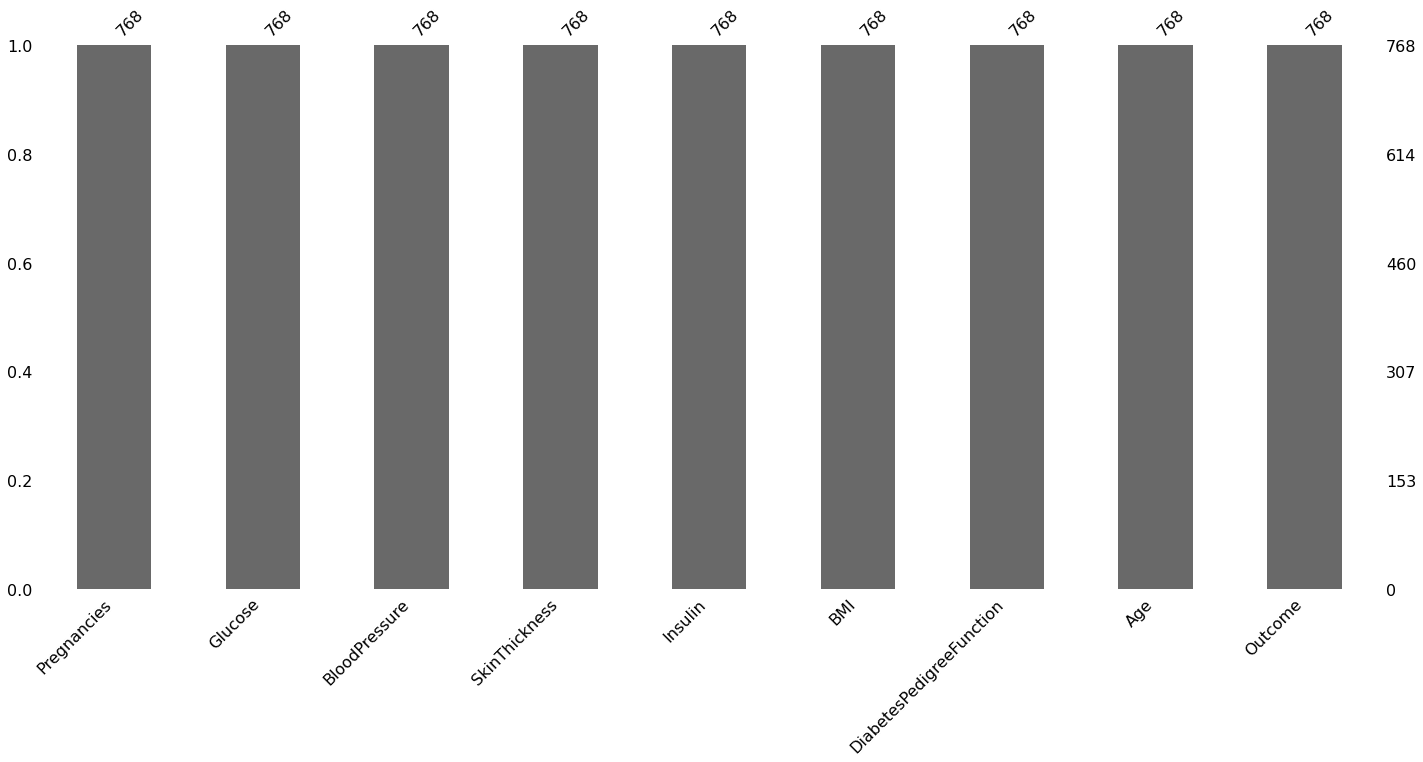

In [70]:
msno.bar(df)

# Since there are no null values found we can safely move on without removing any rows or filling up any Null values

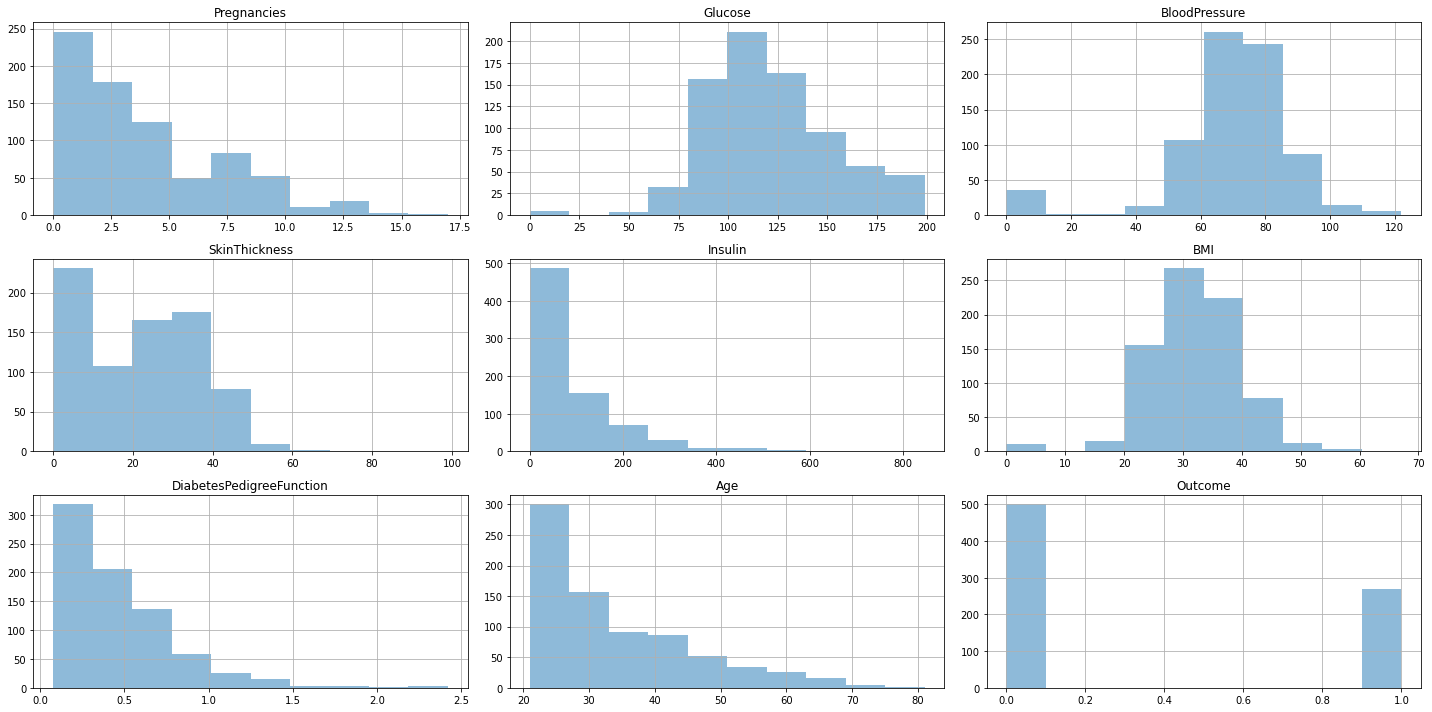

In [71]:
df.hist(alpha=0.5, figsize=(20, 10))
plt.tight_layout()
plt.show()

In [72]:
df['Age'].value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
32    16
36    16
38    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
50     8
44     8
51     8
52     8
58     7
47     6
54     6
57     5
60     5
48     5
49     5
53     5
55     4
62     4
63     4
66     4
56     3
59     3
65     3
67     3
61     2
69     2
72     1
64     1
68     1
70     1
81     1
Name: Age, dtype: int64

# Since we can see that Age attribute doesn't have any Null Values we can compare other attributes with Age to clean the data

# First we visualize BloodPressure with Age and we see that there are a few values at 0. Since these values will interefere with the accuracy of the model, we replace them with the average Blood Pressure value

<AxesSubplot:xlabel='Age'>

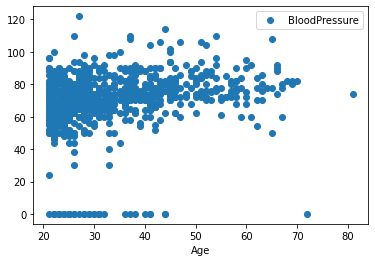

In [73]:
df.plot(x='Age', y='BloodPressure', style='o')

# Thus, we find the mean value of Blood Pressure and replace the 0 values with mean BloodPressure

In [74]:
mean_bp=df["BloodPressure"].mean()
mean_bp

69.10546875

In [75]:
df['BloodPressure'] = df['BloodPressure'].replace([0],mean_bp)

<AxesSubplot:xlabel='Age'>

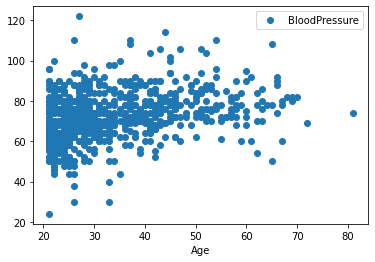

In [76]:
df.plot(x='Age', y='BloodPressure', style='o')

# We now do the same for all the attributes

# Glucose also has some 0 values so we find the average and replace all 0's

<AxesSubplot:xlabel='Age'>

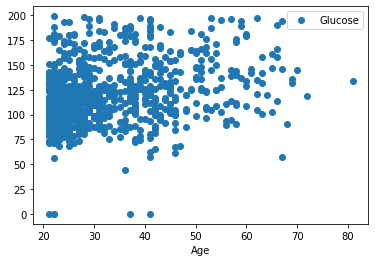

In [77]:
df.plot(x='Age', y='Glucose', style='o')

In [78]:
mean_glc=df["Glucose"].mean()
mean_glc

120.89453125

In [79]:
df['Glucose'] = df['Glucose'].replace([0],mean_glc)

<AxesSubplot:xlabel='Age'>

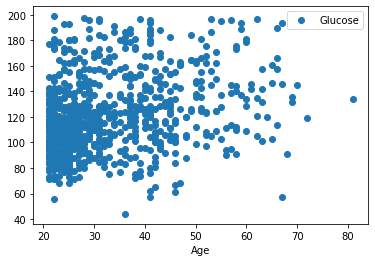

In [80]:
df.plot(x='Age', y='Glucose', style='o')

# Again do the same for BMI

<AxesSubplot:xlabel='Age'>

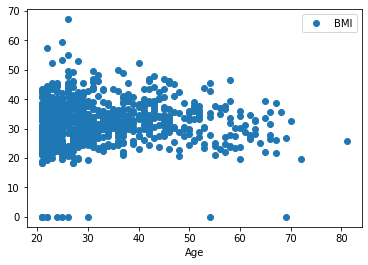

In [81]:
df.plot(x='Age', y='BMI', style='o')

In [82]:
mean_bmi=df["BMI"].mean()
df['BMI'] = df['BMI'].replace([0],mean_bmi)

<AxesSubplot:xlabel='Age'>

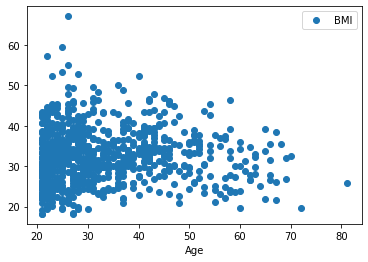

In [83]:
df.plot(x='Age', y='BMI', style='o')

# Now we look at Insulin. 

<AxesSubplot:xlabel='Age'>

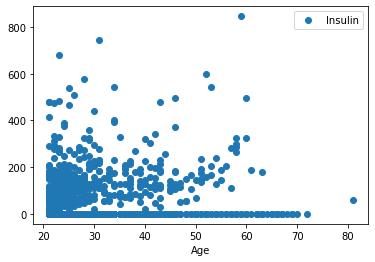

In [84]:
df.plot(x='Age', y='Insulin', style='o')

# Here we notice that a lot of people have 0 insulin but that is a sign of diabetes. Thus we won't remove it or change the values. 

# Now we look for any inconsistencies in the DiabetesPedigreeFunction. This shows the likelihood of having diabetes based on family 

<AxesSubplot:xlabel='Age'>

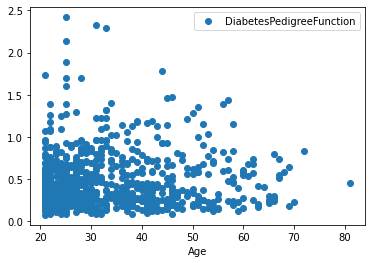

In [85]:
df.plot(x='Age', y='DiabetesPedigreeFunction', style='o')

In [86]:
df['DiabetesPedigreeFunction'].value_counts()

0.254    6
0.258    6
0.259    5
0.238    5
0.207    5
        ..
0.886    1
0.804    1
1.251    1
0.382    1
0.375    1
Name: DiabetesPedigreeFunction, Length: 517, dtype: int64

# Since there are none with probability 0 we can move on without making any modifications to this column

# Now we look at Skin Thickness

<AxesSubplot:xlabel='Age'>

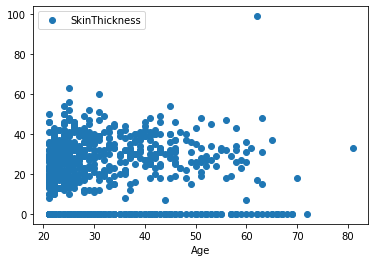

In [87]:
df.plot(x='Age', y='SkinThickness', style='o')

In [88]:
df['SkinThickness'].value_counts()

0     227
32     31
30     27
27     23
23     22
33     20
18     20
28     20
31     19
39     18
19     18
29     17
37     16
26     16
22     16
40     16
25     16
35     15
41     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
34      8
46      8
38      7
12      7
14      6
16      6
11      6
43      6
45      6
10      5
44      5
48      4
47      4
50      3
49      3
54      2
52      2
7       2
8       2
60      1
56      1
63      1
51      1
99      1
Name: SkinThickness, dtype: int64

# Now we see that 0 value occurs 227 times. If we replace them with the average value of SkinThickness it will alter the distribution of data drastically. Thus the only step we can take is to remove the column from the data set.

In [89]:
df = df.drop(['SkinThickness'], axis = 1) 

In [90]:
df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,0,33.6,0.627,50,1
1,1,85.0,66.0,0,26.6,0.351,31,0
2,8,183.0,64.0,0,23.3,0.672,32,1
3,1,89.0,66.0,94,28.1,0.167,21,0
4,0,137.0,40.0,168,43.1,2.288,33,1


# Now we check for the Pregnencies attribute where there are no irregularities so we can skip modification of this column

<AxesSubplot:xlabel='Age'>

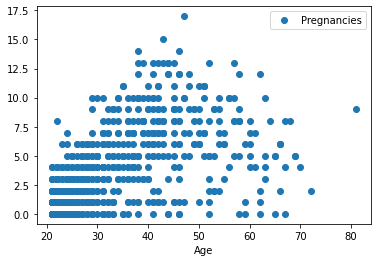

In [91]:
df.plot(x='Age', y='Pregnancies', style='o')

In [92]:
df.isnull().sum()
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Now we use a heatmap to visualize how much each attribute contributes to the outcome

                          Pregnancies   Glucose  BloodPressure   Insulin  \
Pregnancies                  1.000000  0.127964       0.208984 -0.073535   
Glucose                      0.127964  1.000000       0.219666  0.331190   
BloodPressure                0.208984  0.219666       1.000000 -0.038147   
Insulin                     -0.073535  0.331190      -0.038147  1.000000   
BMI                          0.021546  0.231478       0.281231  0.185365   
DiabetesPedigreeFunction    -0.033523  0.137106       0.000371  0.185071   
Age                          0.544341  0.266600       0.326740 -0.042163   
Outcome                      0.221898  0.492908       0.162986  0.130548   

                               BMI  DiabetesPedigreeFunction       Age  \
Pregnancies               0.021546                 -0.033523  0.544341   
Glucose                   0.231478                  0.137106  0.266600   
BloodPressure             0.281231                  0.000371  0.326740   
Insulin            

<AxesSubplot:>

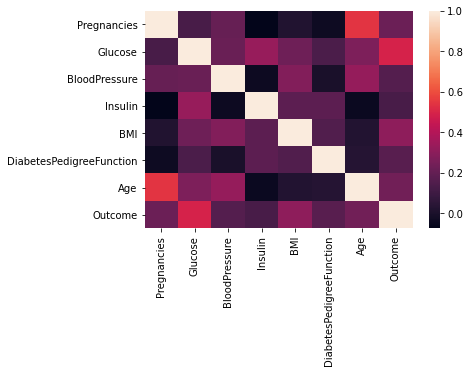

In [93]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

# From the above plot, the brighter the colours the more correlation that attribute has ro the outcome. Thus in our data, BMI, Glucose Value and Pregnancies have a correlation with the outcome.  

# Now we see that there are no 0 values nor are there any Null values which means that we can go ahead and split the data for Training, Testing and Checking.

In [94]:
train = df[:650]
test = df[650:750]
check = df[750:]

In [95]:
trainLabel = np.asarray(train['Outcome'])
trainData = np.asarray(train.drop('Outcome',1))
testLabel = np.asarray(test['Outcome'])
testData = np.asarray(test.drop('Outcome',1))
checkLabel = np.asarray(check['Outcome'])
checkData = np.asarray(check.drop('Outcome',1))

In [96]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds
checkData = (checkData - means)/stds

# We import the Logistic Regression model from scikit learn and pass the training data to it 

In [167]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression()

In [168]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  78.0 %


# Now after we train the model and test the accuracy using test data we pass in the check dataset without labels and collect the predictions. 

In [119]:
sampleData = check[0:18]# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('Outcome',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds# predict
predictionProbability = diabetesCheck.predict_proba(sampleDataFeatures)
prediction = diabetesCheck.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)
print ('Check:', checkLabel)

Probability: [[0.41775886 0.58224114]
 [0.71039717 0.28960283]
 [0.90502565 0.09497435]
 [0.28681306 0.71318694]
 [0.26936276 0.73063724]
 [0.5321714  0.4678286 ]
 [0.49661501 0.50338499]
 [0.71438515 0.28561485]
 [0.82752252 0.17247748]
 [0.09598203 0.90401797]
 [0.91205009 0.08794991]
 [0.05445984 0.94554016]
 [0.92589286 0.07410714]
 [0.73106983 0.26893017]
 [0.67213676 0.32786324]
 [0.83879564 0.16120436]
 [0.75894226 0.24105774]
 [0.93166132 0.06833868]]
prediction: [1 0 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0]
Check: [1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0]


# As shown, the predictions of the model are similar to the outcomes of the check dataset except for a few inconsistencies

# Now we print a confusion matrix which shows exactly how many predictions we got right.

In [106]:
from sklearn.metrics import confusion_matrix

In [127]:
cf_matrix = confusion_matrix(checkLabel, prediction)
print(cf_matrix)

[[9 1]
 [3 5]]


<AxesSubplot:>

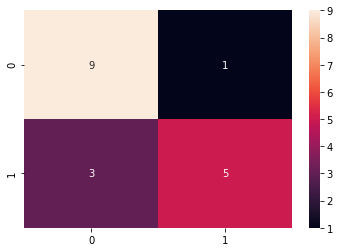

In [128]:
sns.heatmap(cf_matrix, annot=True)

# In the above matrix,
## 9 were True Positives (We predicted positive and it’s true)
## 5 were True Negatives (We predicted Negative and it’s true)
## 3 were False Negatives (We predicted Negative and it’s actually Positive)
## 1 was False Positive (We predicted Postitive but it’s actually Negative) 


<AxesSubplot:>

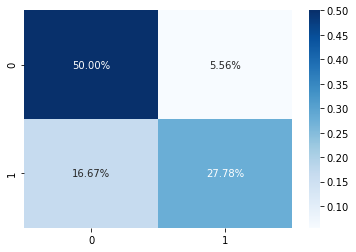

In [129]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

# Now we print the Classification Report of the model which shows the Precision, Accuracy and the F1-score of the model

In [114]:
from sklearn import metrics

In [138]:
print(metrics.classification_report(checkLabel,prediction))

              precision    recall  f1-score   support

           0       0.75      0.90      0.82        10
           1       0.83      0.62      0.71         8

    accuracy                           0.78        18
   macro avg       0.79      0.76      0.77        18
weighted avg       0.79      0.78      0.77        18



# Since we have finished a preliminary build of the model, we can try to improve the accuracy. For this we use hyperparameter tuning. In this process GridSeachCV to go though diffferent combinations of the parameters in the parameter grid and find the best match.

In [131]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [132]:
logModel = LogisticRegression()

In [133]:
from sklearn.model_selection import GridSearchCV

In [134]:
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [135]:
best_clf = clf.fit(trainData,trainLabel)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done 4252 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 4800 out of 4800 | elapsed:    5.4s finished
C:\Users\karth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1320: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  warnings.warn(


In [136]:
best_clf.best_estimator_

LogisticRegression(C=78.47599703514607, max_iter=2500, penalty='none',
                   solver='saga')

In [137]:
print (f'Accuracy - : {best_clf.score(trainData,trainLabel):.3f}')

Accuracy - : 0.783


# After hyperparameter tuning the accuracy does not increase substantially thus we try using a weighted class method.

In [171]:
diabetesCheck = LogisticRegression(class_weight={0:1,1:2})
diabetesCheck.fit(trainData, trainLabel)

LogisticRegression(class_weight={0: 1, 1: 2})

In [172]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

accuracy =  72.0 %


# On trying multiple weight combinations we see that the accuracy comes down rather than increasing. Thus we use balanced weights and use the model with a 78% accuracy rate.